In [57]:
import pandas as pd

filename = '/home/ajay/Downloads/titanic_data.csv'
titanic_df = pd.read_csv(filename)

titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.0500,NaN,S


In [58]:
def remove_nan(df):
    def remove_nan(column):
        return column.dropna()
    return df.apply(remove_nan)
passenger_class_count = titanic_df.groupby('Pclass', as_index=False).count()
passenger_class_sum = titanic_df.groupby('Pclass', as_index=False).sum()

In [59]:
passenger_class_count.head()

,Pclass,PassengerId,Survived,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,216,216,216,216,186,216,216,216,216,176,214
1,2,184,184,184,184,173,184,184,184,184,16,184
2,3,491,491,491,491,355,491,491,491,491,12,491


In [60]:
passenger_class_sum.head()

,Pclass,PassengerId,Survived,Age,SibSp,Parch,Fare
0,1,99705,136,7111.42,90,77,18177.4125
1,2,82056,87,5168.83,74,70,3801.8417
2,3,215625,119,8924.92,302,193,6714.6951


In [61]:
passenger_class_death = passenger_class_count['Survived'] - passenger_class_sum['Survived']
passenger_class_death

0     80
1     97
2    372
Name: Survived, dtype: int64

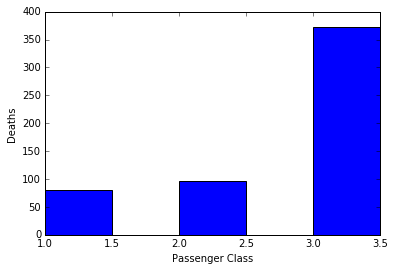

In [62]:
import matplotlib.pyplot as plt
import seaborn as sns

bins = [1, 2, 3]

plt.bar(bins, passenger_class_death, width=0.5)
plt.xlabel('Passenger Class')
plt.ylabel('Deaths')
plt.show()

In [56]:
survived_df = titanic_df.groupby(['Survived', 'Sex'], as_index=False).count()

survived_df

,Survived,Sex,PassengerId,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,0,female,81,81,81,64,81,81,81,81,6,81
1,0,male,468,468,468,360,468,468,468,468,62,468
2,1,female,233,233,233,197,233,233,233,233,91,231
3,1,male,109,109,109,93,109,109,109,109,45,109


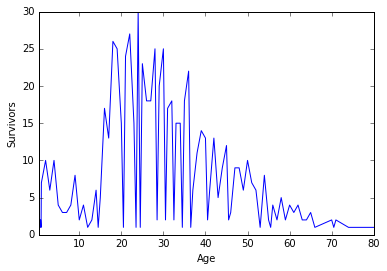

In [29]:
age_df = titanic_df.groupby('Age').count()['Survived']
age_df.plot()
plt.ylabel('Survivors')
plt.show()


In [13]:
from matplotlib.backends.backend_pdf import PdfPages

pp = PdfPages('Titanic_Plots.pdf')

In [14]:
pp.close()